In [12]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
try:
  os.symlink('/content/drive/My Drive/quantum_ml/libs',nb_path)
except FileExistsError as f:
  pass
sys.path.insert(0,nb_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --target=%nb_path qiskit-aer 

In [ ]:
!pip install qiskit-aqua 

In [ ]:
pip install qiskit

  Using cached qiskit_aer-0.10.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (18.0 MB)
     |████████████████████████████████| 238 kB 5.4 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 3.6 MB 54.0 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=d1d488ff001a749e9816c6f4fb0713489f6dfc6673d9e77249cf5d3817eceacd
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c944ed
Successfully built qiskit


In [ ]:
!pip install scipy==1.5.4

  Using cached scipy-1.5.4-cp37-cp37m-manylinux1_x86_64.whl (25.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
#from qiskit import *
import numpy as np
#from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
#from qiskit.aqua import QuantumInstance
#from qiskit.aqua.algorithms import VQC
#from qiskit.aqua.algorithms import QSVM
#from qiskit.circuit.library import ZZFeatureMap  


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import time
from sklearn.metrics import accuracy_score
import random
import math

In [ ]:
#load image
#convert to bgr 
#normalize
#create sequence 
#predict 1/0
# recreate mask 


In [34]:
import cv2
def load_image(path):
  im = cv2.imread(path)
  return im

def normalize(data,max_val,n):
  d = np.divide(data,max_val)
  return d + n
def create_skin_mask(path,model):
  c = 3
  
  skin = []
  im = load_image(path)
  h = im.shape[0]
  w = im.shape[1]
  im = im.reshape((-1,c))
  im = normalize(im,255,0)
  
  logit,im =model.predict(im)
  im = np.array(im).reshape(h,w)
  im = normalize(im,1/255,0)
  print(im.shape)
  plt.imshow(im,cmap="gray")
  return

In [15]:
def normalize(data,max_val,n):
  d = np.divide(data,max_val)
  return d + n

In [5]:
im_path = "/content/download_face.jpg"
im = load_image("/content/download_face.jpg")


In [ ]:
j = im.reshape((-1,3))
j = normalize(j,255,0)

In [ ]:
for k in j:
  print(k.T.shape)
  


(3, 40000)

In [19]:
from abc import ABC,abstractmethod
class Model(ABC):
  @abstractmethod
  def predict(self,data):
    pass

    

In [ ]:
#!pip install qiskit-aqua
#!pip install qiskit-aer

In [6]:
path = "/content/drive/MyDrive/quantum_ml/Skin_NonSkin.txt"
R = []
G = []
B = []
Label = []
with open(path,'r') as op:
  for line in op.readlines():
    line = line.split()
    B.append(int(line[0]))
    G.append(int(line[1]))
    R.append(int(line[2]))
    Label.append(int(line[3]))

In [7]:
data = pd.DataFrame({'B':B, 'G':G,"R":R,'Skin':Label})

In [8]:
data = data[:150000]

In [ ]:
data.describe()

In [9]:
skin = []
nt_skin = []
size =50000
train_size = 20000
test_size = 1000
labels =[]
for i in range(len(data)):
  if len(skin)>=size:
    break
  elif Label[i] == 1:
    skin.append([B[i],G[i],R[i]])
    labels.append(Label[i])
for i in range(len(data)):
  if len(nt_skin)>=size:
    break
  elif Label[i] == 2:
    nt_skin.append([B[i],G[i],R[i]])  
  
    labels.append(Label[i])
skin = np.array(skin)
nt_skin= np.array(nt_skin)

def normalize(data,max_val,n):
  d = np.divide(data,max_val)
  return d + n
n_skin = normalize(skin,255,0)
n_nt_skin = normalize(nt_skin,255,0)

datapoints = []
val_skin = n_skin[0:5]
val_nt_skin = n_nt_skin[0:5]
val_data = np.append(val_skin, val_nt_skin).reshape(10,3)
datapoints.append(val_data)
v_dp_y = np.array([0,0,0,0,0,1,1,1,1,1])
datapoints.append(v_dp_y)

training_input = {'A':n_skin[0:train_size],'B':n_nt_skin[0:train_size]}
x = train_size+test_size+1
test_input = {'A':n_skin[train_size:x],'B':n_nt_skin[train_size:x]}

class_to_label = {'A':0,'B':1}


In [ ]:
n_skin.shape

(50000, 3)

In [ ]:
n_nt_skin.shape

(50000, 3)

In [ ]:
datapoints[1]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:

k

array([0.29019608, 0.33333333, 0.48235294])

In [ ]:
n_skin.shape

(50000, 3)

In [ ]:
seed = 100
feature_dim = skin.shape[1]
feature_dim

3

In [ ]:

backend = BasicAer.get_backend('qasm_simulator')
backend_options = {'method':'statevector'}
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator = seed, seed_transpiler =seed, backend_options=backend_options )

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement='full')

In [ ]:
from qiskit.circuit.library  import EfficientSU2
var_circuit = EfficientSU2(feature_dim, reps = 2)

In [ ]:
from qiskit.aqua.components.optimizers import COBYLA
cobyla = COBYLA(maxiter = 100, tol= 0.001)

In [ ]:
vqc = VQC( optimizer = cobyla, feature_map = feature_map , var_form = var_circuit,
          training_dataset = training_input, test_dataset = test_input, datapoints= datapoints[0])




In [ ]:
result = vqc.run(quantum_instance)

print("testing accuracy: {}".format(result['testing_accuracy']))
print("prediction of datapoints:")
print("Actual: {}".format(map_label_to_class_name(datapoints[1], vqc.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

In [ ]:
param = vqc.optimal_params

In [ ]:
import pickle

save_path = "/content/drive/MyDrive/quantum_ml/vqc_param_1.pkl"
with open(save_path) as fp:
  pickle.dump(param,fp)


In [ ]:
create_mask(im_path,vqc)

In [ ]:
pred = vqc.predict(j)

In [ ]:
a,b = pred

In [ ]:
b = np.array(b).reshape(200,200)

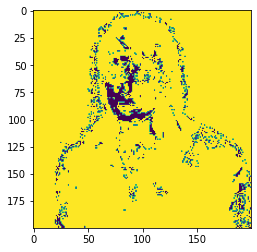

In [ ]:
plt.imshow(b,cmap='grey')

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = Aer.get_backend('qasm_simulator')
backend_options = {'method':'statevector'}
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f"Testing Accuracy: {result['testing_accuracy'] * 100}%")
print("Prediction on Datapoints:")
print(f"Ground Truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}")
print(f"Predictions:  {result['predicted_classes']}")

Testing Accuracy: 92.15784215784217%
Prediction on Datapoints:
Ground Truth: ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
Predictions:  ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


Trained Kernel Matrix:


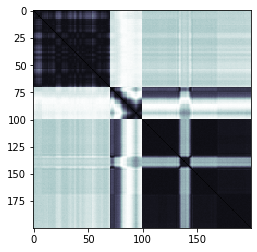

In [ ]:
print("Trained Kernel Matrix:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

In [ ]:
X.shape

(10000, 3)

In [11]:
X = np.concatenate((n_skin[0:train_size+test_size],n_nt_skin[0:train_size+test_size]))
y = labels[0:train_size+test_size]+labels[size:size+train_size+test_size]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,shuffle=True,train_size=0.099,
                                                     random_state=1)

In [ ]:
del n_skin
del n_nt_skin
del skin

(1983, 3)

In [17]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(64,128,64), 
                    activation='relu', solver='adam',
                    alpha=0.0001, batch_size='auto', learning_rate='constant',
                    learning_rate_init=0.001, power_t=0.5, 
                    max_iter=200, shuffle=True, random_state=None,
                    tol=0.0001, verbose=False, warm_start=False,
                    momentum=0.9, nesterovs_momentum=True,
                    early_stopping=False, validation_fraction=0.1,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08,
                    n_iter_no_change=10, max_fun=15000)

In [18]:
MLP.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 128, 64))

In [38]:

class MLP_c(Model):
  def __init__(self,model):
    self.model = model
  def predict(self,data):
    preds = self.model.predict(data) - 1;
    inv = np.ones_like(preds)
    preds = preds^inv;
    logits = [1]
    return logits,preds

mod = MLP_c(MLP)

(200, 200)


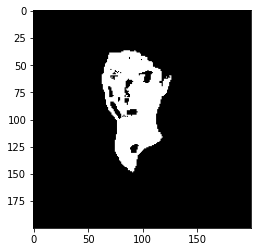

In [39]:
create_skin_mask(im_path,mod)

In [20]:
MLP.score(X_test,y_test)

0.998520162782094

In [40]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9964853866074732

In [ ]:
clf.get_params()

In [42]:
mod2 = MLP_c(clf)

(200, 200)


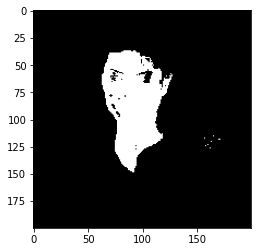

In [43]:
create_skin_mask(im_path,mod2)

In [ ]:
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [ ]:
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
import tensorflow as tf

In [ ]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)-1

TensorShape([217])

In [ ]:
from sklearn.utils.extmath import weighted_mode
x_in = layers.Input(shape=(feature_dim,))
## embedding
x = layers.Dense(kernel_matrix.shape[0], activation='relu')(x_in)
x = layers.Dense(200, activation='relu',name='ipl',kernel_initializer=tf.keras.initializers.Constant(k_M))(x)


x = layers.Dense(128, activation='relu',)(x)
x = layers.Dense(64, activation='relu',)(x)
x = layers.Dense(32, activation='relu',)(x)
y_out = layers.Dense(2, activation='softmax')(x)             
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()
training = model.fit(x=X_train, y=y_train, batch_size=16, 
                     epochs=50,  shuffle=True, verbose=1, validation_split=0.1,)

#save_model(model,'/content/model.pth')

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_155 (Dense)           (None, 200)               800       
                                                                 
 ipl (Dense)                 (None, 200)               40200     
                                                                 
 dense_156 (Dense)           (None, 128)               25728     
                                                                 
 dense_157 (Dense)           (None, 64)                8256      
                                                                 
 dense_158 (Dense)           (None, 32)                2080      
                                                                 
 dense_159 (Dense)           (None, 2)                 66 

In [ ]:
k_m = tf.convert_to_tensor(kernel_matrix,dtype=tf.float32)

In [ ]:
k_M = tf.Variable(k_m,trainable=False)

In [ ]:
y_train

In [ ]:
X_test[0]

array([0.77647059, 0.77647059, 0.61960784])

In [ ]:
model.predict(tf.convert_to_tensor(X_test[0:16]))

array([[14.32757  ,  7.9415374, 13.4949665,  9.711059 , 11.910935 ,
        13.384311 ,  0.       ,  0.       ,  0.       , 13.352579 ,
         0.       ,  7.357128 , 12.028808 , 18.368643 ,  9.8312645,
        12.339892 , 13.715758 ,  7.4920197, 23.781757 ,  0.       ,
        19.297962 ,  0.       , 14.374647 ,  0.       , 14.763881 ,
        16.300644 , 15.647088 ,  9.456519 , 11.263444 , 11.416629 ,
         0.       , 12.127965 ],
       [16.557512 ,  9.331569 , 15.634547 , 11.189519 , 13.849086 ,
        15.463666 ,  0.       ,  0.       ,  0.       , 15.462404 ,
         0.       ,  8.444434 , 13.990724 , 21.257265 , 11.306991 ,
        14.345927 , 15.82839  ,  8.731364 , 27.678068 ,  0.       ,
        22.380663 ,  0.       , 16.685326 ,  0.       , 17.012995 ,
        18.951426 , 18.116045 , 10.862178 , 13.073527 , 13.153531 ,
         0.       , 13.98435  ],
       [16.386957 ,  9.235552 , 15.473034 , 11.07393  , 13.706275 ,
        15.303887 ,  0.       ,  0.       ,  0.   

In [ ]:
img = []
def mask(img):
  assert len(img.shape) == 3, 
  h,w,c = img.shape
  np.flatten()
def predicta(X):
  pass